# MMAI 891: Individual Assignment

<font color='red'>\# TODO: fill in the below</font>

- [Student Name: Kishore Kumar, Jayabalan]
- [Student number: 20208065]
- [Section number: 2]
- [Favorite book: You by Kepnes, Caroline]
- [Date: 24-04-2021]

# Assignment Instructions

This assignment contains one (1) question with multiple parts. The question and parts are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers/solutions. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about runing out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

## Questions

Each question has multiple tasks. There are two possible types of tasks: tasks that require you to write code and tasks that require you to write text responses. A grading rubric is provided on D2L for each question.

For tasks that require **code**:
- Use Python to complete the task.
- You may use standard Python libraries, including scikit-learn, pandas, and numpy.
- Tips:
  - Submit code that runs without errors.
  - Submit code that is reproducible. E.g., set random number seeds as appropriate. You should be able to run you code again and again and again, from the top of the file to the bottom of the file, and get the exact same results each time. I should be able to run your code, from scratch, again and again, and get the exact same results that you get.
  - Submit code that is organized. Make your code readable. Provide comments to describe what the code is doing and why. Don’t leave “old” code laying around. Overall, if your code is clear and easy to read, then we will be happy. When we are happy, we give better marks.

For tasks that require **text responses**:
- Type your response in Notebook cell indicated.
- Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose.
- Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).
- You may refer to your code in your answer. Please do so very clearly. E.g., “As can be seen in on line X above …“


## What to Submit to the Course Portal

- You are to export your completed Notebook as a PDF file by clicking File->Print->Save as HTML.
- Please do not submit the Notebook (.ipynb) file to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file 21_891_FirstnameLastName.pdf
      - E.g., *21_891_StephenThomas.pdf*
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2021-04-25 18:03:03.995262


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.7.10


In [5]:
!echo $PYTHONPATH

/env/python


In [6]:
# TODO: install any packages you need to here. For example:
!pip install unidecode
!pip install textaugment

import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw')
nltk.download('stopwords')
nltk.download('vader_lexicon')

import re
import matplotlib.pyplot as plt
import unidecode
import spacy
import string
import unicodedata

from functools import partial
from nltk.corpus import wordnet
from nltk import pos_tag
from wordcloud import WordCloud,STOPWORDS
from matplotlib import rcParams
from nltk import word_tokenize, FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

#For text augmentation
from textaugment import Wordnet
from tqdm import tqdm
from sklearn.utils import shuffle

#Import Visualization Libraries
import seaborn as sns

#Import Libraries for Model Evaluation
import sklearn.metrics as metrics

sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Question 1: Sentiment Analysis via Shallow ML



In [7]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1b8MAiN-xBdk6scM-DnufkuijDZivZJqM")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [8]:
# DO NOT MODIFY THIS CELL

# Next, we'll split it into training and test
from sklearn.model_selection import train_test_split

X = df['Sentence']
y = df['Polarity']

# So that we can evaluate how well our model is performing, we split our training data
# into training and validation.

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

## Part 1.a: Preprocessing and FE Pipeline

Clean and preprocess the data (i.e., `X_train`) as you see necessary. Extract features from the text (i.e., vectorization using BOW and/or Bag of N-Grams and/or topics and/or lexical features). 


**Perform EDA**

Visualize the Polarity counts

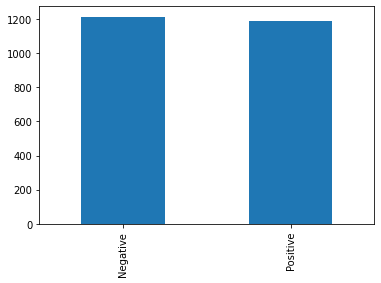

In [9]:
df['Polarity'].replace({0:'Negative',1:'Positive'}).value_counts().plot(kind='bar')

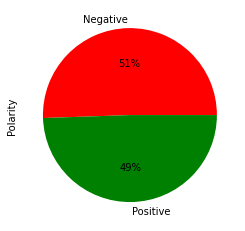

In [10]:
df.Polarity.replace({0:'Negative',1:'Positive'}).value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "green"])

**Check for Duplicates**

In [11]:
df.loc[df['Sentence'].duplicated(keep=False)]

,Sentence,Polarity
26,#NAME?,0
71,#NAME?,1
219,#NAME?,1
334,I love this place.,1
380,I won't be back.,0
383,The food was terrible.,0
505,I would not recommend this place.,0
814,I love this place.,1
816,The food was terrible.,0
843,I won't be back.,0


**Drop Duplicates if found**

In [12]:
df = df.drop_duplicates('Sentence',keep='last')
df.shape

(2382, 2)

**Parse for Single Words**

In [13]:
df[df.Sentence.apply(lambda x: len(x.split()))==1]


,Sentence,Polarity
165,DELICIOUS!!,1
904,#NAME?,0
1185,Incredible!.,1
1463,Disappointed!.,0
1751,disappointing.,0
1777,WORTHWHILE.,1
1877,Excellent!.,1
1993,disappointed.,0
2124,Brilliant!,1
2125,10-Oct,1


In [14]:
df = df[df['Sentence'].ne('#NAME?')]
df = df[df['Sentence'].ne('10-Oct')]
df.shape

(2380, 2)

**EDA on Positive Sentences**

In [15]:
df_positive = df[df['Polarity']==1]
df_positive.head()

,Sentence,Polarity
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1


**Using WordCloud to visualize common words (Positive Sentiments)**

<function matplotlib.pyplot.show>

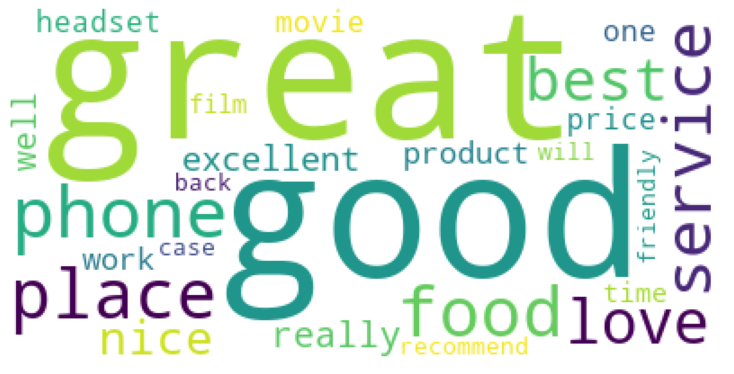

In [16]:
#set stop words 
stopwords = set(STOPWORDS)
WC = WordCloud(stopwords=stopwords,max_words=25,
               background_color="white").generate(df_positive['Sentence'].to_string())

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show

**Display the count of tokens for Positive Sentiments**

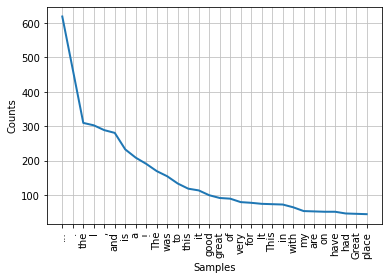

In [17]:
tokens = word_tokenize(df_positive['Sentence'].to_string())
fd = nltk.FreqDist(tokens)
fd.plot(30)

**EDA on Negative Sentences**

In [18]:
df_negative = df[df['Polarity']==0]
df_negative.head()

,Sentence,Polarity
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0


**Using WordCloud visualize common words (Negative Sentiments)**

<function matplotlib.pyplot.show>

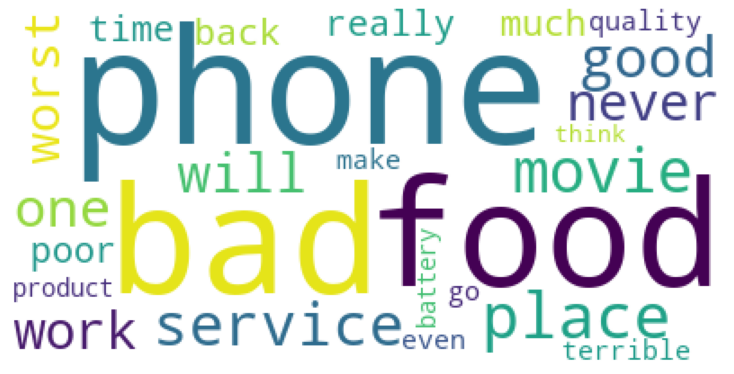

In [19]:
WC = WordCloud(stopwords=stopwords,max_words=25,background_color="white").generate(df_negative['Sentence'].to_string())

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show

**Display the count of tokens for Negative Sentiments**

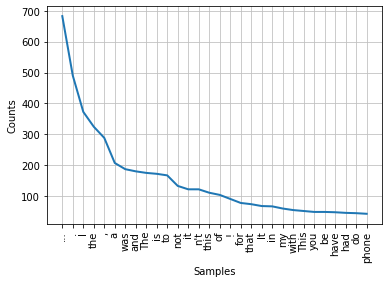

In [20]:
tokens = word_tokenize(df_negative['Sentence'].to_string())
fd = nltk.FreqDist(tokens)
fd.plot(30)

**Function for Spacey Tokenizer**

In [21]:
def spacy_tokenize(text, nlp):
    return [x.orth_ for x in nlp(text)]

nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
tok = partial(spacy_tokenize, nlp=nlp)

**Define the StopWords list based on EDA**

In [22]:
stopword = ['a','the','i','and','a', 'be','have','had','are','they','is', 'if','of','the','this']
wn = nltk.WordNetLemmatizer()

**Function for Data Cleaning and Preprocessing**

In [23]:
def data_preprocess(docs):

  #Unicode to Ascii
  text =''.join(c for c in unicodedata.normalize('NFD', docs) if unicodedata.category(c) != 'Mn')

  # Remove all the special characters
  text = re.sub(r'\W', ' ', text)

  # Remove all single characters
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ',text)

  text = re.sub(r"[^A-Za-z0-9]", " ", text)

  # Substituting multiple spaces with single space
  text = re.sub(r'[" "]+', " ", text)

  # Remove all numbers
  text = re.sub('\d+', '', text)

  #Tokenize the text
  tokens = nltk.word_tokenize(text)

  #Convert the tokens to lowercase
  clean_text = [word.lower() for word in tokens]

  #Remove stopwords
  clean_text = [word for word in clean_text if word not in stopword]

  #Lemmatize the tokens
  clean_text = [wn.lemmatize(word) for word in clean_text]

  #Combine back the tokens to sentences
  clean_text = " ".join(clean_text)


  return clean_text


**Verify if data preprocessing works**

In [24]:
df['Sentence'][257]

"I as well would've given godfathers zero stars if possible."

In [25]:
data_preprocess('Special thanks to Dylan T. for the recommendation on what to order :) All yummy for my tummy.')


'special thanks to dylan for recommendation on what to order all yummy for my tummy'

## Part 1.b: Model Training/Tuning/Cross Validation

Use your favorite shallow ML algorithm (such as decision trees, KNN, random forest, boosting variants) to train a classification model.  Don’t forget everything that we’ve learned in the machine learning course: hyperparameter tuning, cross validation, handling imbalanced data, etc. Make reasonable decisions and try to create the best-performing model that you can.


**Generate Sentiment Score as one of the Features (using VADER package)**

In [26]:
def generate_sentiment_score(corpus):
  score_dict = [sid.polarity_scores(doc) for doc in corpus]
  score = []
  for key in score_dict:
    score.append(key['compound'])
  return np.array(score).reshape(-1, 1)


**Build the Pipelines for Feature Processing**

In [27]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Convert the sentences to vectors
vectorizer = TfidfVectorizer(preprocessor=data_preprocess,tokenizer= tok, 
                             max_df = 0.5, min_df=2, 
                             max_features = 500, ngram_range=[1,2])

#Random Forest classifier declaration
rf = RandomForestClassifier(criterion='entropy', random_state=1)

In [28]:
feature_processing =  FeatureUnion([ 
    ('bow', Pipeline([('vectorizer', vectorizer), ])),
    ('sentiment_score', FunctionTransformer(generate_sentiment_score, validate=False)),  

])

pipe = Pipeline([('features', feature_processing), ('clf', rf)])

**Train the model (Using GridSearchCV / Hyperparameters)**

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'features__bow__vectorizer__max_features': [1000],
    'features__bow__vectorizer__max_df': [0.2],
    'features__bow__vectorizer__ngram_range': [(1,2),(2,2),(4,4)],
    'features__bow__vectorizer__use_idf': [True, False],
    'clf__n_estimators': [200,250],
    'clf__bootstrap': [True, False]
    
}


search = GridSearchCV(pipe, 
                      param_grid, 
                      cv=5, 
                      n_jobs=5, 
                      scoring='f1_macro', 
                      return_train_score=True, 
                      verbose=2)

search = search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  5.0min
[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed: 15.9min finished


In [30]:
print("Best parameter (CV score: %0.5f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score: 0.84094):
{'clf__bootstrap': True, 'clf__n_estimators': 200, 'features__bow__vectorizer__max_df': 0.2, 'features__bow__vectorizer__max_features': 1000, 'features__bow__vectorizer__ngram_range': (1, 2), 'features__bow__vectorizer__use_idf': False}


**Text Augmentation - To evaluate and comparision with base model metrics**

In [31]:
def augment_text(df,samples=500):
    t = Wordnet()
    new_text_minority=[]

    ##selecting the minority class samples
    df_n=df[df.Polarity==1].reset_index(drop=True)

    ## data augmentation loop
    for i in tqdm(np.random.randint(0,len(df_n),samples)):
        
            text = df_n.iloc[i]['Sentence']
            augmented_text = t.augment(text)
            new_text_minority.append(augmented_text)
    

    ## dataframe
    new=pd.DataFrame({'Sentence':new_text_minority,'Polarity':1})
    df=shuffle(df.append(new).reset_index(drop=True))
    return df

In [32]:
df = augment_text(df)

100%|██████████| 500/500 [00:00<00:00, 638.06it/s]


In [33]:
df['Polarity'].value_counts()


1    1675
0    1205
Name: Polarity, dtype: int64

In [34]:
X = df['Sentence']
y = df['Polarity']


#Perform Train, Test split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

search_textaug = GridSearchCV(pipe, 
                      param_grid, 
                      cv=5, 
                      n_jobs=5, 
                      scoring='f1_macro', 
                      return_train_score=True, 
                      verbose=2)

search_textaug = search_textaug.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  5.4min
[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed: 18.2min finished


**Train the model with text augmentation**

In [35]:
print("Best parameter (CV score: %0.5f):" % search_textaug.best_score_)
print(search_textaug.best_params_)

Best parameter (CV score: 0.87826):
{'clf__bootstrap': True, 'clf__n_estimators': 200, 'features__bow__vectorizer__max_df': 0.2, 'features__bow__vectorizer__max_features': 1000, 'features__bow__vectorizer__ngram_range': (1, 2), 'features__bow__vectorizer__use_idf': False}


## Part 1.c: Model Assessment 

Use your model to predict the sentiment of the testing data. Measure the performance (e.g., accuracy, AUC, F1-score) of your model. 

In [36]:
# DO NOT MODIFY THIS CELL

test_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1taoTluPBUMt9JkKAnlqDTrU49DJFpJGW")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


**Function for Model Evaluation**

In [37]:
# TODO: insert code here 

from sklearn.metrics import roc_curve, auc,accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import confusion_matrix

def eval_model(y_pred,y_test):

    target_names = ['negative', 'positive']
    print("\nClassification Report")
    print("\n")
    print(classification_report(y_test, y_pred, target_names=target_names))

    cf_matrix = confusion_matrix(y_test, y_pred)
    df_cf_matrix = pd.DataFrame(cf_matrix, index=target_names, columns=target_names)

    print("\nConfusion Matrix (Heatmap)")
    print("\n")
    sns.set(font_scale=1.4) 
    sns.heatmap(df_cf_matrix, annot=True, annot_kws={"size": 16},fmt='g') 
    plt.show()

    result = pd.DataFrame(cf_matrix.reshape(-1, 4), columns=["True Negative", "False Positive", "False Negative", "True Positive"])

    print("\nConfusion Matrix")
    print("\n")
    print(result.to_string(index=False))
    print("\n")
    print("\n")

In [38]:
def model_rocauc(pred_prob,y_test):
  # roc curve for classes
  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 2

  #Extract FPR and TPR details to plot ROC Curve
  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

  # #Calculate AUC
  AUC_score = roc_auc_score(y_test,pred_prob[:,1])

  #Plot the ROC curve   

  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1')
  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'blue',label='AUC = %0.2f ' % (AUC_score), alpha=1)
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300);    

**Model Prediction**


Classification Report


              precision    recall  f1-score   support

    negative       0.77      0.88      0.82       287
    positive       0.88      0.76      0.82       313

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.83      0.82      0.82       600


Confusion Matrix (Heatmap)




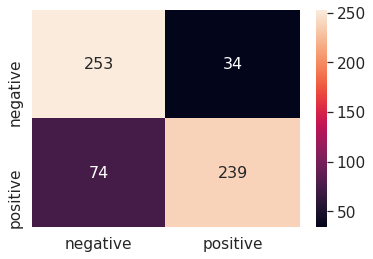


Confusion Matrix


 True Negative  False Positive  False Negative  True Positive
           253              34              74            239






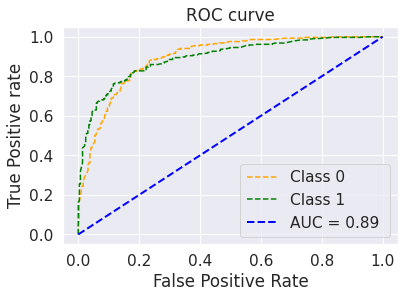

In [39]:
#Predict using the model
x_test=test_df['Sentence']
y_test=test_df['Polarity']

predict_class   = search.predict(x_test)
predict_prob    = search.predict_proba(x_test)

eval_model(predict_class, y_test)
model_rocauc(predict_prob, y_test)

## Part 2: Given the performance of your model, are you satisfied with the results? Explain.

Keep your response to 1000 characters or less.

Overall, the model performed well. The F1-macro score was 0.84 for the training dataset, and the F1-score for test data was 0.82 and AUC of 0.89 for positive class. The model did not overfit to a large extent. Further hyperparameter tuning and more data cleaning are required to achieve a more better F1 macro score. Through text augmentation with 500 sampes added to positive sentiments, the model F1-macro got increased to 0.88 for training set. I am satisfied with the performance of the model.

## Part 3: Show five test instances in which your model was incorrect. Dive deep and find out why your model was wrong.

Keep your response to 1000 characters or less.

**Extract model predictions (FP,FN,TP,TN) to analyze model performance**

In [40]:
test_pred_df = test_df
test_pred_df['Predicted_class'] = predict_class


In [41]:
fp_list = test_pred_df[(test_pred_df['Polarity']==0) & (test_pred_df['Predicted_class']==1) ]
fn_list = test_pred_df[(test_pred_df['Polarity']==1) & (test_pred_df['Predicted_class']==0) ]
tp_list = test_pred_df[(test_pred_df['Polarity']==1) & (test_pred_df['Predicted_class']==1) ]
tn_list = test_pred_df[(test_pred_df['Polarity']==0) & (test_pred_df['Predicted_class']==0) ]

**Instance 1:** The model identified 74 False Negatives (Type II error), the sentences that had positive polarity as a true label, the model predicted as negative class. In the below example, the model used "NOT" keywords to identify the context of th sentences.

In [42]:
fn_list['Sentence'][12]

'Not too screamy not to masculine but just right.  '

**Instance 2:** In total, the model predicted  34 False Positives (Type 1 error). In the below example, the model used keywords like "Best" to understand the context of the sentences. The model was not able to use keywords like "Sloppy" to understand the negative context.

In [43]:
fp_list['Sentence'][77]

'The directing is sloppy at best.  '

**Instance 3:** The model was not performing well with long sentences, especially with False Negative predictions. The model was not able to understand the full context of the sentence. (Example below)

In [44]:
fn_list['Sentence'][141]

'This second appearance of Mickey Mouse (following the silent PLANE CRAZY earlier that year) is probably his most famous film--mostly because it was so ground-breaking.  '

**Instance 4:**  The positive class precision was higher (0.88) compared to the negative class of 0.77. The higher precision score was due to the presence of more keywords to identify positive class like - "Good", "Great," "Excellent," "Nice," "Best."

**Instance 5:** The model failed to predict the correct class for the sentences that are questions with negative polarity. 

In [45]:
fp_list[5:6]

,Sentence,Polarity,Predicted_class
108,What this film lacks is a convincing script.,0,1


## Part 4 (Optional): Sentiment Analysis via Deep ML

This part is optional and will be worth up to 5 extra credit marks.

Use deep learning (e.g., RNNs and variants, CNNs and variants, and/or transformers) to build a model on the same dataset and compare the results with the Shallow ML model.

You may train your own deep ML model (using, e.g., the keras library) or use a pre-trained deep ML model (using, e.g., the transformers library).

**Import Transformers and Bert model libraries**

In [46]:
# TODO: Insert code here.
!pip install transformers
import transformers
from transformers import BertTokenizer, TFBertModel

In [47]:
#Import Keras Libraries
from tensorflow.keras.layers import Dense, Input, Dropout
import tensorflow as tf
import tensorflow.keras as keras
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
print('TF version',tf.__version__)

TF version 2.4.1


**Initiate Bert model**

In [48]:
PRE_TRAINED_MODEL_NAME ='bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
base_model = TFBertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


**Visualize the token lengths**

In [49]:
token_lens = []
sentences = df['Sentence']
for txt in df['Sentence']:
  tokens = tokenizer.encode(txt, max_length=96)
  token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


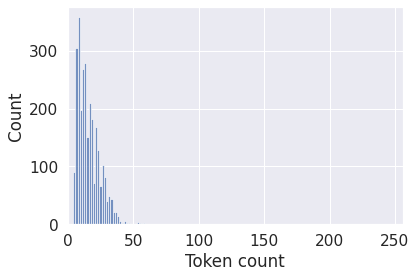

In [50]:
sns.histplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

**Set maximum token length**

In [51]:
MAX_SEQ_LEN =96

In [52]:
def encode_text(text):
    input_ids, attention_mask = [], []
    SEQ_LEN = MAX_SEQ_LEN

    tokens = tokenizer.batch_encode_plus(text, 
                                         max_length=SEQ_LEN, 
                                         add_special_tokens = True, 
                                         pad_to_max_length = True)
    input_ids= np.array(tokens['input_ids'])
    attention_mask= np.array(tokens['attention_mask'])
    
    return input_ids, attention_mask


**Generate the encodings (Input and Attention Masks) for Training and Test**

In [53]:
train_inputs_masks = encode_text(X_train) 
val_inputs_masks = encode_text(X_val) 
test_inputs_masks = encode_text(test_df['Sentence'])


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


**Build the model**

In [54]:
def build_model(base_model):
    max_seq_len = MAX_SEQ_LEN

    inputs = Input(shape = (max_seq_len,), dtype='int64', name='inputs')
    masks  = Input(shape = (max_seq_len,), dtype='int64', name='masks')

    base_model.trainable = False

    dbert_output = base_model(inputs, attention_mask=masks)
    dbert_last_hidden_state = dbert_output.last_hidden_state

    cls_token = dbert_last_hidden_state[:, 0, :]
   
    #Define the layers
    my_outputs =keras.layers.Dense(128, activation='relu')(cls_token)
    my_outputs =keras.layers.Dropout(0.5)(my_outputs)
    probs = tf.keras.layers.Dense(1, activation="sigmoid", name="dense_output")(my_outputs)

    model = keras.Model(inputs=[inputs, masks], outputs=probs)
    model.summary()

    return model

**Function for model compilation**

In [55]:
def compile_model(model):
  model.compile(keras.optimizers.Adam(lr=1e-5), loss='binary_crossentropy',  metrics='accuracy')
  return model

**Function for training the model**

In [56]:
def train_model(model, model_inputs_and_masks_train, y_train,model_inputs_and_masks_val,y_val, batch_size, num_epochs):
  train_inp =model_inputs_and_masks_train[0]
  train_mask =model_inputs_and_masks_train[1]
  val_inp= model_inputs_and_masks_val[0]
  val_mask =model_inputs_and_masks_val[1]

  history = model.fit( x=[train_inp,train_mask], y=y_train, validation_data=([val_inp,val_mask],y_val), batch_size=batch_size, epochs=num_epochs)

  #Plot Loss and Accuracy during Training
  plt.figure(1, figsize=(12,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='valid')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='valid')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
    
  return model, history

**Build the model**

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 96)]         0                                            
__________________________________________________________________________________________________
masks (InputLayer)              [(None, 96)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   inputs[0][0]                     
                                                                 masks[0][0]                      
__________________________________________________________________________________________________
tf.__operators__.getitem_2 (Sli (None, 768)          0           tf_bert_model[2][0]        

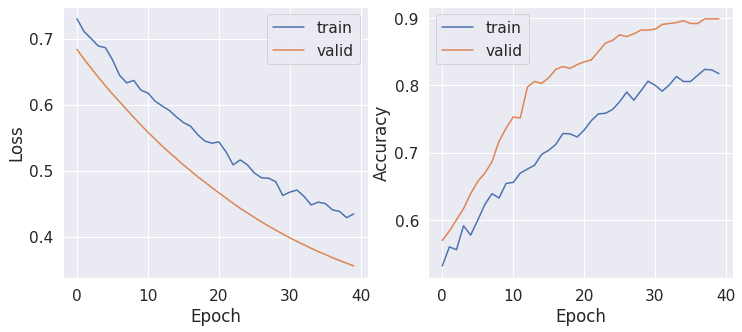

In [60]:
BATCH_SIZE=32
EPOCHS=40
model = build_model(base_model)
model = compile_model(model)
model, history = train_model(model, train_inputs_masks,y_train, val_inputs_masks,y_val, batch_size=BATCH_SIZE, num_epochs=EPOCHS)

**Evaluate the model**


Classification Report


              precision    recall  f1-score   support

    negative       0.81      0.90      0.85       287
    positive       0.89      0.81      0.85       313

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.86      0.85      0.85       600


Confusion Matrix (Heatmap)




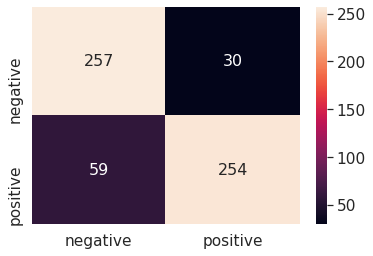


Confusion Matrix


 True Negative  False Positive  False Negative  True Positive
           257              30              59            254






In [61]:
predict_class = (model.predict([test_inputs_masks[0], test_inputs_masks[1]])  > 0.5).astype(int)
predict_prob = model(test_inputs_masks, training=False)
eval_model(predict_class, y_test)


**Comparision with ML and DL model:**
The DL performed better than the shallow ML model. The DL model used BERT to tokenize the sentences and understand the context of the sentences. With 40 epochs and batch size of 32, the model had an excellent F1-macro score of 0.85 for the test dataset. With more number of training epochs the model can be improved further for better F1 score.
